In [118]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,x_test),(y_train,y_test) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


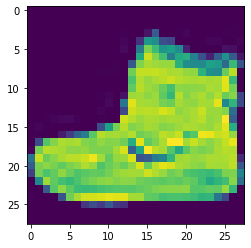

In [119]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
plt.imshow(x_train[0])

In [127]:
X=x_train[:100] 
X.shape

(100, 28, 28)

In [128]:
X = X.reshape((X.shape[0], X.shape[1]**2))        
X = X - np.average(X, axis=0) 
X.shape

(100, 784)

In [129]:
X_meaned = X - np.mean(X , axis = 0)
X_meaned.shape

(100, 784)

In [130]:
cov_mat = np.cov(X_meaned , rowvar = False)   # rowvar = False >> work with X_meaned as transposed

print (cov_mat.shape)
# print (cov_mat)

(784, 784)


In [131]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [132]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
# print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [135]:
n_components = 200 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print (eigenvector_subset.shape)

(784, 200)


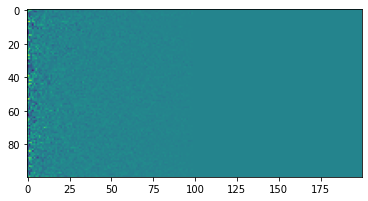

In [136]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
plt.imshow(X_reduced)